# NMF with sparsity Constraint from Hoyer 2004

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import morphoMaths
import pandas as pd
from scipy import io
import metrics

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
print('x_test shape:', x_test.shape)

x_test shape: (10000, 28, 28, 1)


## Sh = 0.6, dim=100

In [3]:
data = io.loadmat('../Results/NMF/18_08_22_sparseNMF_dim100_spH0.6')
W = data['W']
H = data['H']
del data
print('W: ', W.shape)
print('H: ', H.shape)
atoms = W.transpose().reshape(100,28,28,1)
H = H.transpose()
x_test_rec_nmf = metrics.reconstructions(atoms, H)
del W

W:  (784, 100)
H:  (100, 10000)


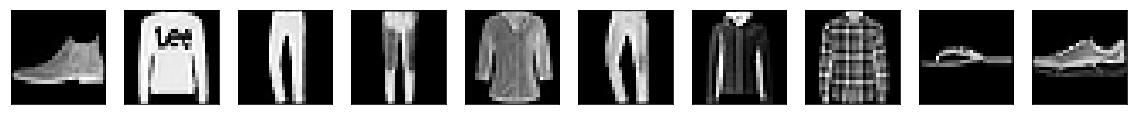

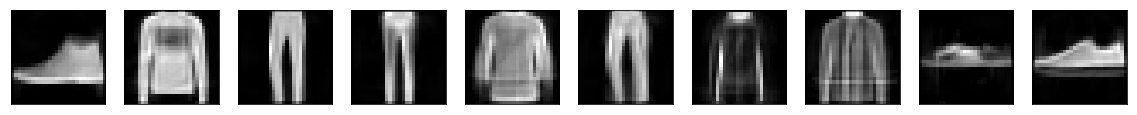

In [7]:
bastien_utils.plot_all_images(x_test[:10])
bastien_utils.plot_all_images(x_test_rec_nmf[:10])

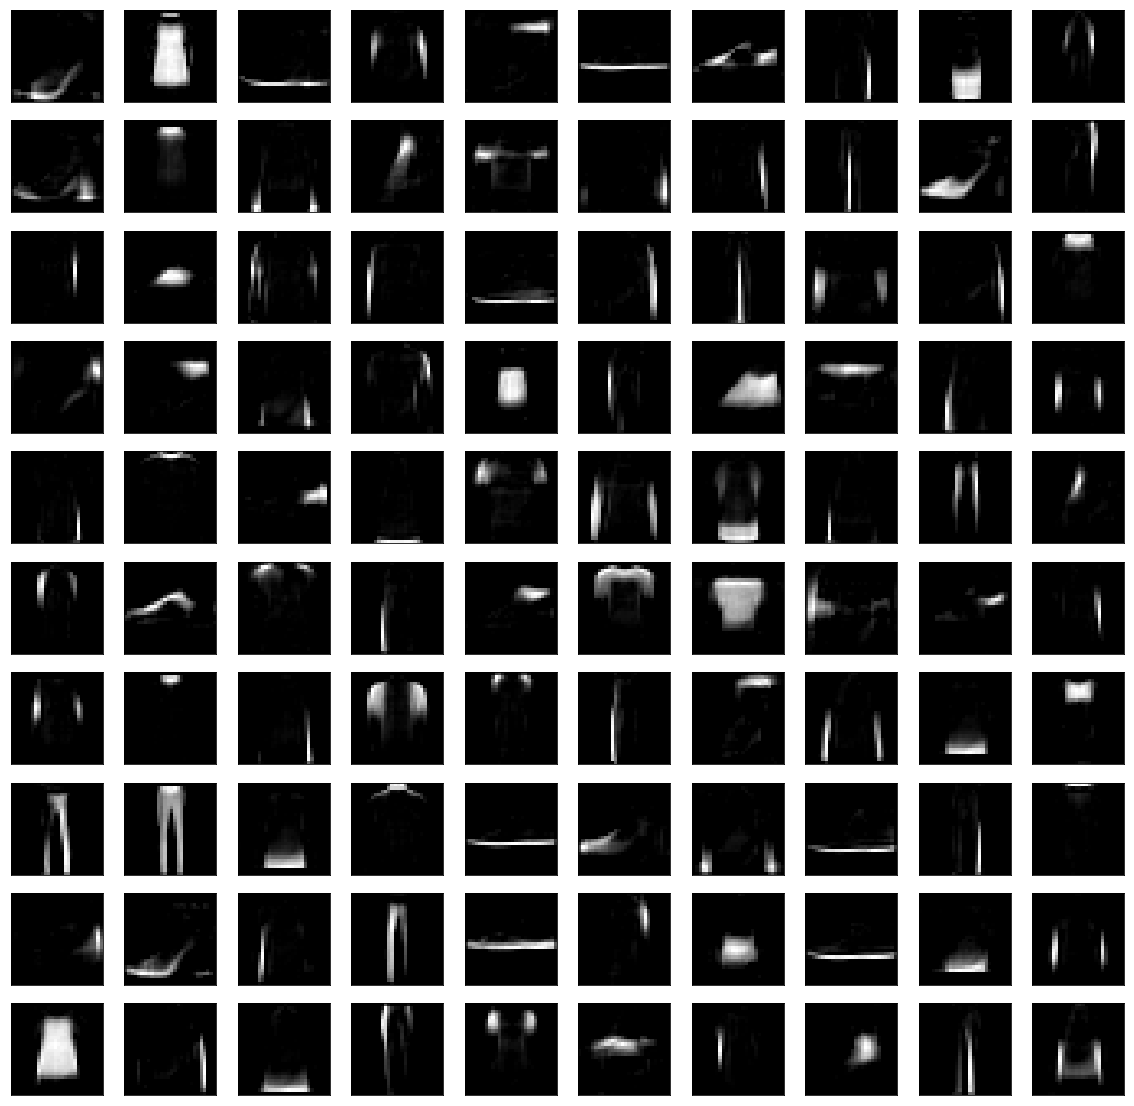

In [19]:
bastien_utils.plot_all_images(atoms)

In [11]:
print('Reconstruction error: ', metrics.reconstruction_error(x_test, atoms, H))
print('Max-approximation error to dilatation (original): ', metrics.max_approximation_error(x_test, atoms, H, morphoMaths.dilatation, SE_scale=1)[0])
print('Max-approximation error to dilatation (reconstruction): ', metrics.max_approximation_error(x_test, atoms, H, morphoMaths.dilatation, SE_scale=1)[1])


Reconstruction error:  0.01094606
Max-approximation error to dilatation (original):  0.10730002934067392
Max-approximation error to dilatation (reconstruction):  0.10570523420711277


Dilatation of original images


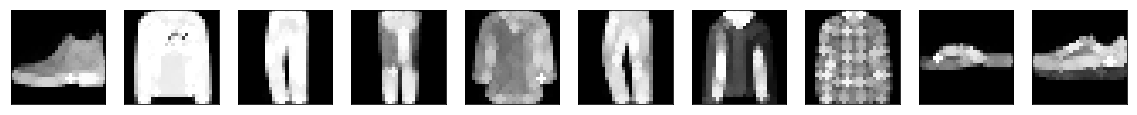

Dilatation of reconstructed images


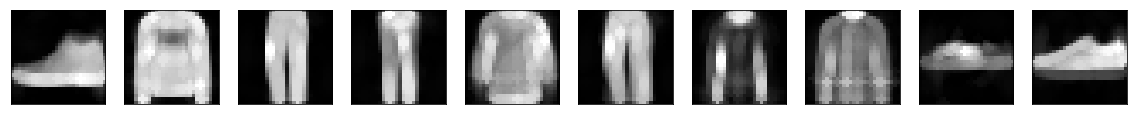

Max-approximation to dilatation


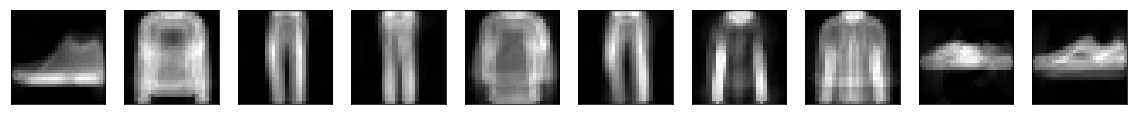

In [7]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test[:10], SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test_rec_nmf[:10], SE_scale=1))
print('Max-approximation to dilatation')
metrics.plot_max_approximation(atoms, H[:10], morphoMaths.dilatation, SE_scale=1)

In [15]:
print("Sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(H))

Sparsity Measure of the encoding (Hoyer):  0.6503538


In [4]:
print("KL divergence sparsity measure to 0.01: ", metrics.sparsity_KL_divergence(H))

KL divergence sparsity measure to 0.01:  0.3091793358325958


In [1]:
print("Best classification score: 0.842, with C=21.544347, gamma=27.825594")

Best classification score: 0.842, with C=21.544347, gamma=27.825594
